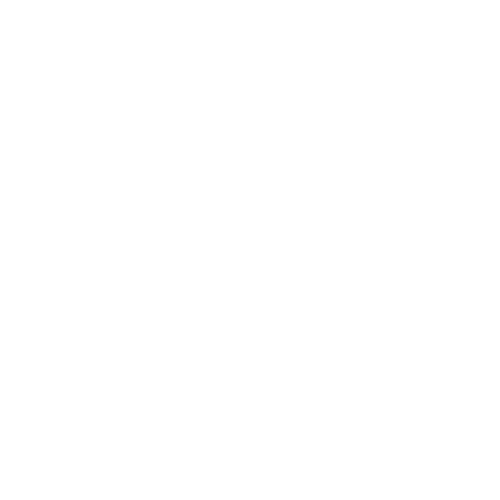

In [7]:
from PIL import Image, ImageDraw
import random

def generate_cloud_image(width, height, num_circles, min_radius, max_radius):
    # Create a transparent background image
    image = Image.new("RGBA", (width, height), (0, 0, 0, 0))
    draw = ImageDraw.Draw(image)
    
    # Center of the cloud
    center_x, center_y = width // 2, height // 2

    for _ in range(num_circles):
        # Randomize circle radius within the given range
        radius = random.randint(min_radius, max_radius)
        
        # Generate random position around the center, with offset depending on the radius
        offset_x = random.randint(-radius, radius)
        offset_y = random.randint(-radius, radius)
        x = center_x + offset_x
        y = center_y + offset_y
        
        # Draw the circle on the image
        bbox = [x - radius, y - radius, x + radius, y + radius]
        draw.ellipse(bbox, fill=(255, 255, 255, 200))  # Semi-transparent white

    return image

# Example usage:
width, height = 500, 500  # Image dimensions
num_circles = 20        # Number of circles in the cloud
min_radius = 20           # Minimum radius of circles
max_radius = 50           # Maximum radius of circles

cloud_image = generate_cloud_image(width, height, num_circles, min_radius, max_radius)
display(cloud_image)


In [16]:
from PIL import Image, ImageDraw
import random
import math

def generate_cloud_animation(width, height, num_circles, min_radius, max_radius, num_frames, spread_speed):
    # Center of the cloud
    center_x, center_y = width // 2, height // 2
    
    # Initialize circles with random positions and radii
    circles = []
    for _ in range(num_circles):
        radius = random.randint(min_radius, max_radius)
        # Initial random position around the center
        offset_x = random.randint(-radius, radius)
        offset_y = random.randint(-radius, radius)
        x = center_x + offset_x
        y = center_y + offset_y
        
        # Calculate the direction vector from the center
        direction_x = x - center_x
        direction_y = y - center_y
        # Normalize the vector
        length = math.sqrt(direction_x**2 + direction_y**2)
        if length != 0:
            direction_x /= length
            direction_y /= length
        
        # Store each circle's position, radius, and direction
        circles.append({
            'x': x,
            'y': y,
            'radius': radius,
            'dir_x': direction_x,
            'dir_y': direction_y
        })

    # Generate frames
    frames = []
    for frame_num in range(num_frames):
        # Create a new image for each frame
        image = Image.new("RGBA", (width, height), (0, 0, 0, 0))
        draw = ImageDraw.Draw(image)
        
        for circle in circles:
            # Calculate the new position based on the direction and spread speed
            circle['x'] += circle['dir_x'] * spread_speed
            circle['y'] += circle['dir_y'] * spread_speed
            
            # Draw the circle at the new position
            bbox = [
                circle['x'] - circle['radius'],
                circle['y'] - circle['radius'],
                circle['x'] + circle['radius'],
                circle['y'] + circle['radius']
            ]
            draw.ellipse(bbox, fill=(255, 255, 255, 200))  # Semi-transparent white
        
        # Add the frame to the list
        frames.append(image)

    return frames

# Parameters
width, height = 500, 500        # Image dimensions
num_circles = 20               # Number of circles in the cloud
min_radius = 20                 # Minimum radius of circles
max_radius = 50                 # Maximum radius of circles
num_frames = 5                 # Total number of frames in the animation
spread_speed = 30                # Speed at which each circle moves outward

# Generate the animation frames
frames = generate_cloud_animation(width, height, num_circles, min_radius, max_radius, num_frames, spread_speed)

# Save as a GIF
frames[0].save("cloud_spread.gif", save_all=True, append_images=frames[1:], duration=30, loop=0)